# Worlds 2022 

#  Based of League of Legends World Championship 2022 champions dataset   

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/league-of-legends-world-championship-2022/wc_champions.csv')

In [3]:
print(f'Number of colums: {df.shape[0]}\nNumber of rows: {df.shape[1]}')

Number of colums: 108
Number of rows: 19


In [4]:
df.columns

Index(['Unnamed: 0', 'champion', 'sum_total', 'win_total', 'lose_total',
       'winrate_total', 'pick_rate', 'sum_blue_side', 'win_blue_side',
       'lose_blue_side', 'winrate_blue_side', 'sum_red_side', 'win_red_side',
       'lose_red_side', 'winrate_red_side', 'sum_bans', 'ban_rate',
       'sum_pick_ban', 'pick_ban_rate'],
      dtype='object')

Columns ['pick_rate', 'winrate_total', 'ban_rate', 'winrate_blue_side', 'winrate_red_side', 'pick_ban_rate'] are converted to numeric types

In [5]:
print(f'Total unique champions: {df.champion.nunique()}')

Total unique champions: 108


In [6]:
columns = ['pick_rate', 'winrate_total', 'ban_rate', 'winrate_blue_side', 'winrate_red_side', 'pick_ban_rate']
chars = ['%', '-']
for column in columns:
    for char in chars:
        df[column] = df[column].astype('str').str.replace(char, '')
    df[column] = pd.to_numeric(df[column])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         108 non-null    int64  
 1   champion           108 non-null    object 
 2   sum_total          108 non-null    int64  
 3   win_total          108 non-null    int64  
 4   lose_total         108 non-null    int64  
 5   winrate_total      108 non-null    float64
 6   pick_rate          108 non-null    float64
 7   sum_blue_side      108 non-null    int64  
 8   win_blue_side      108 non-null    int64  
 9   lose_blue_side     108 non-null    int64  
 10  winrate_blue_side  87 non-null     float64
 11  sum_red_side       108 non-null    int64  
 12  win_red_side       108 non-null    int64  
 13  lose_red_side      108 non-null    int64  
 14  winrate_red_side   101 non-null    float64
 15  sum_bans           108 non-null    int64  
 16  ban_rate           108 non

In [8]:
df.isna().any()

Unnamed: 0           False
champion             False
sum_total            False
win_total            False
lose_total           False
winrate_total        False
pick_rate            False
sum_blue_side        False
win_blue_side        False
lose_blue_side       False
winrate_blue_side     True
sum_red_side         False
win_red_side         False
lose_red_side        False
winrate_red_side      True
sum_bans             False
ban_rate             False
sum_pick_ban         False
pick_ban_rate        False
dtype: bool

In [9]:
df.head()

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate
0,0,Sylas,50,33,17,66.00,39.37,28,21,7,75.00,22,12,10,54.55,49,38.58,99,77.95
1,1,Sejuani,49,24,25,48.98,38.58,23,12,11,52.17,26,12,14,46.15,57,44.88,106,83.46
2,2,Azir,48,24,24,50.00,37.80,27,14,13,51.85,21,10,11,47.62,43,33.86,91,71.65
3,3,Aatrox,46,29,17,63.04,36.22,35,24,11,68.57,11,5,6,45.45,79,62.20,125,98.43
4,4,Aphelios,43,23,20,53.49,33.86,20,10,10,50.00,23,13,10,56.52,20,15.75,63,49.61


In [10]:
df.tail()

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate
103,103,Singed,1,0,1,0.0,0.79,1,0,1,0.0,0,0,0,NaN,1,0.79,2,1.57
104,104,Sion,1,0,1,0.0,0.79,0,0,0,NaN,1,0,1,0.0,0,0.00,1,0.79
105,105,Teemo,1,0,1,0.0,0.79,0,0,0,NaN,1,0,1,0.0,0,0.00,1,0.79
106,106,Tryndamere,1,0,1,0.0,0.79,0,0,0,NaN,1,0,1,0.0,0,0.00,1,0.79
107,107,Vladimir,1,0,1,0.0,0.79,0,0,0,NaN,1,0,1,0.0,0,0.00,1,0.79


In [11]:
df.sample(3)

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate
10,10,Viktor,29,11,18,37.93,22.83,14,8,6,57.14,15,3,12,20.0,20,15.75,49,38.58
89,89,Nocturne,1,1,0,100.00,0.79,0,0,0,NaN,1,1,0,100.0,3,2.36,4,3.15
78,78,Jhin,2,1,1,50.00,1.57,1,0,1,0.00,1,1,0,100.0,0,0.00,2,1.57


In [12]:
df.describe()

,Unnamed: 0,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate
count,108.00000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,87.000000,108.000000,108.000000,108.000000,101.000000,108.000000,108.000000,108.000000,108.000000
mean,53.50000,11.768519,5.898148,5.870370,43.470556,9.266481,5.879630,3.194444,2.685185,49.515287,5.888889,2.703704,3.185185,41.472079,11.750000,9.251389,23.518519,18.518426
std,31.32092,12.261639,6.983211,5.850302,28.900423,9.655128,6.919723,4.296180,3.202359,30.230181,5.936318,3.207058,3.212558,32.569969,17.337294,13.651484,27.282352,21.482224
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.790000
25%,26.75000,2.000000,1.000000,1.000000,24.305000,1.570000,1.000000,0.000000,0.000000,30.000000,1.000000,0.000000,1.000000,12.500000,1.000000,0.790000,4.000000,3.150000
50%,53.50000,8.000000,3.500000,4.000000,49.490000,6.300000,4.000000,2.000000,1.000000,50.000000,4.000000,1.000000,2.000000,41.670000,6.000000,4.720000,13.500000,10.630000
75%,80.25000,16.000000,9.000000,9.250000,59.445000,12.600000,8.250000,5.000000,4.000000,66.670000,8.000000,4.000000,5.000000,60.000000,13.250000,10.435000,33.000000,25.980000
max,107.00000,50.000000,33.000000,25.000000,100.000000,39.370000,35.000000,24.000000,14.000000,100.000000,26.000000,13.000000,14.000000,100.000000,86.000000,67.720000,125.000000,98.430000


In [13]:
new_df = df[df.sum_total >= 10]
new_df[:10]

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate
0,0,Sylas,50,33,17,66.00,39.37,28,21,7,75.00,22,12,10,54.55,49,38.58,99,77.95
1,1,Sejuani,49,24,25,48.98,38.58,23,12,11,52.17,26,12,14,46.15,57,44.88,106,83.46
2,2,Azir,48,24,24,50.00,37.80,27,14,13,51.85,21,10,11,47.62,43,33.86,91,71.65
3,3,Aatrox,46,29,17,63.04,36.22,35,24,11,68.57,11,5,6,45.45,79,62.20,125,98.43
4,4,Aphelios,43,23,20,53.49,33.86,20,10,10,50.00,23,13,10,56.52,20,15.75,63,49.61
5,5,Maokai,43,22,21,51.16,33.86,27,13,14,48.15,16,9,7,56.25,48,37.80,91,71.65
6,6,Viego,38,24,14,63.16,29.92,20,13,7,65.00,18,11,7,61.11,18,14.17,56,44.09
7,7,Akali,33,18,15,54.55,25.98,13,8,5,61.54,20,10,10,50.00,34,26.77,67,52.76
8,8,Graves,33,16,17,48.48,25.98,14,7,7,50.00,19,9,10,47.37,50,39.37,83,65.35
9,9,Lucian,30,19,11,63.33,23.62,15,10,5,66.67,15,9,6,60.00,29,22.83,59,46.46


In [14]:
px.bar(
    x=df["champion"],
    y=df["sum_total"],
    color=df["sum_total"],
    color_continuous_scale="redor",
    labels={"x": "Champion", "y": "Total Matches"},
    title="Most Picked Champions",
)

In [15]:
px.bar(
    x=new_df["champion"],
    y=new_df["sum_total"],
    color=new_df["sum_total"],
    color_continuous_scale="teal",
    labels={"x": "Champion", "y": "Total Matches"},
    title="Most Picked Champions (more than 10 matches played)",
)


In [16]:
top_wr = new_df.sort_values(ascending=False, by='winrate_total')[['champion', 'sum_total', 'win_total', 'lose_total', 'winrate_total', 'pick_rate']]
top_wr[:10]

,champion,sum_total,win_total,lose_total,winrate_total,pick_rate
34,Yuumi,14,12,2,85.71,11.02
36,Sivir,13,11,2,84.62,10.24
38,Gragas,12,9,3,75.00,9.45
42,Rell,10,7,3,70.00,7.87
0,Sylas,50,33,17,66.00,39.37
40,Tahm Kench,11,7,4,63.64,8.66
9,Lucian,30,19,11,63.33,23.62
22,Amumu,19,12,7,63.16,14.96
6,Viego,38,24,14,63.16,29.92
3,Aatrox,46,29,17,63.04,36.22


In [17]:
px.bar(
    x=top_wr["champion"][:20],
    y=top_wr["winrate_total"][:20],
    color=top_wr["winrate_total"][:20],
    color_continuous_scale="blugrn",
    labels={"x": "Champion", "y": "Win Rate"},
    title="Highest Win Rate (more than 10 matches played)",
)


In [18]:
least_wr = new_df.sort_values(by="winrate_total")[
    ["champion", "sum_total", "win_total", "lose_total", "winrate_total", "pick_rate"]
]
least_wr[:10]

,champion,sum_total,win_total,lose_total,winrate_total,pick_rate
30,Nautilus,16,3,13,18.75,12.60
46,Seraphine,10,2,8,20.00,7.87
45,Galio,10,2,8,20.00,7.87
23,Renekton,18,5,13,27.78,14.17
29,Taliyah,16,5,11,31.25,12.60
33,Poppy,15,5,10,33.33,11.81
41,Sett,11,4,7,36.36,8.66
12,Leona,27,10,17,37.04,21.26
28,Jax,16,6,10,37.50,12.60
10,Viktor,29,11,18,37.93,22.83


In [19]:
px.bar(
    x=least_wr["champion"][:20],
    y=least_wr["winrate_total"][:20],
    color=least_wr["winrate_total"][:20],
    color_continuous_scale="magma",
    labels={"x": "Champion", "y": "Win Rate"},
    title="Lowest Win Rate (more than 10 matches played)",
)

In [20]:
most_wins = df.sort_values(by='win_total', 
                           ascending=False)[:20]
most_wins[:10]

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate
0,0,Sylas,50,33,17,66.00,39.37,28,21,7,75.00,22,12,10,54.55,49,38.58,99,77.95
3,3,Aatrox,46,29,17,63.04,36.22,35,24,11,68.57,11,5,6,45.45,79,62.20,125,98.43
2,2,Azir,48,24,24,50.00,37.80,27,14,13,51.85,21,10,11,47.62,43,33.86,91,71.65
6,6,Viego,38,24,14,63.16,29.92,20,13,7,65.00,18,11,7,61.11,18,14.17,56,44.09
1,1,Sejuani,49,24,25,48.98,38.58,23,12,11,52.17,26,12,14,46.15,57,44.88,106,83.46
4,4,Aphelios,43,23,20,53.49,33.86,20,10,10,50.00,23,13,10,56.52,20,15.75,63,49.61
5,5,Maokai,43,22,21,51.16,33.86,27,13,14,48.15,16,9,7,56.25,48,37.80,91,71.65
9,9,Lucian,30,19,11,63.33,23.62,15,10,5,66.67,15,9,6,60.00,29,22.83,59,46.46
7,7,Akali,33,18,15,54.55,25.98,13,8,5,61.54,20,10,10,50.00,34,26.77,67,52.76
8,8,Graves,33,16,17,48.48,25.98,14,7,7,50.00,19,9,10,47.37,50,39.37,83,65.35


In [21]:
px.bar(
    x=most_wins["champion"],
    y=most_wins["win_total"],
    color=most_wins["win_total"],
    color_continuous_scale="darkmint",
    labels={"x": "Champion", "y": "Wins"},
    title="Most Wins",
)


In [22]:
most_loses = df.sort_values(by='lose_total', 
                            ascending=False)[:20]
most_loses[:10]

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate
1,1,Sejuani,49,24,25,48.98,38.58,23,12,11,52.17,26,12,14,46.15,57,44.88,106,83.46
2,2,Azir,48,24,24,50.00,37.80,27,14,13,51.85,21,10,11,47.62,43,33.86,91,71.65
5,5,Maokai,43,22,21,51.16,33.86,27,13,14,48.15,16,9,7,56.25,48,37.80,91,71.65
4,4,Aphelios,43,23,20,53.49,33.86,20,10,10,50.00,23,13,10,56.52,20,15.75,63,49.61
10,10,Viktor,29,11,18,37.93,22.83,14,8,6,57.14,15,3,12,20.00,20,15.75,49,38.58
0,0,Sylas,50,33,17,66.00,39.37,28,21,7,75.00,22,12,10,54.55,49,38.58,99,77.95
3,3,Aatrox,46,29,17,63.04,36.22,35,24,11,68.57,11,5,6,45.45,79,62.20,125,98.43
8,8,Graves,33,16,17,48.48,25.98,14,7,7,50.00,19,9,10,47.37,50,39.37,83,65.35
12,12,Leona,27,10,17,37.04,21.26,15,4,11,26.67,12,6,6,50.00,8,6.30,35,27.56
15,15,Kalista,25,10,15,40.00,19.69,9,5,4,55.56,16,5,11,31.25,43,33.86,68,53.54


In [23]:
px.bar(
    x=most_loses["champion"],
    y=most_loses["lose_total"],
    color=most_loses["lose_total"],
    color_continuous_scale="orrd",
    labels={"x": "Champion", "y": "Loses"},
    title="Most Loses",
)


In [24]:
most_bans = df.sort_values(by='sum_bans', 
                           ascending=False)[:20]
most_bans[:10]

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate
39,39,Caitlyn,12,5,7,41.67,9.45,5,4,1,80.00,7,1,6,14.29,86,67.72,98,77.17
34,34,Yuumi,14,12,2,85.71,11.02,10,9,1,90.00,4,3,1,75.00,85,66.93,99,77.95
3,3,Aatrox,46,29,17,63.04,36.22,35,24,11,68.57,11,5,6,45.45,79,62.20,125,98.43
1,1,Sejuani,49,24,25,48.98,38.58,23,12,11,52.17,26,12,14,46.15,57,44.88,106,83.46
8,8,Graves,33,16,17,48.48,25.98,14,7,7,50.00,19,9,10,47.37,50,39.37,83,65.35
0,0,Sylas,50,33,17,66.00,39.37,28,21,7,75.00,22,12,10,54.55,49,38.58,99,77.95
5,5,Maokai,43,22,21,51.16,33.86,27,13,14,48.15,16,9,7,56.25,48,37.80,91,71.65
2,2,Azir,48,24,24,50.00,37.80,27,14,13,51.85,21,10,11,47.62,43,33.86,91,71.65
15,15,Kalista,25,10,15,40.00,19.69,9,5,4,55.56,16,5,11,31.25,43,33.86,68,53.54
7,7,Akali,33,18,15,54.55,25.98,13,8,5,61.54,20,10,10,50.00,34,26.77,67,52.76


In [25]:
px.bar(
    x=most_bans["champion"],
    y=most_bans["sum_bans"],
    color=most_bans["sum_bans"],
    color_continuous_scale="amp",
    labels={"x": "Champion", "y": "Bans"},
    title="Most Bans",
)

In [26]:
most_ban_r = df.sort_values(by="ban_rate", ascending=False)[:20]
px.bar(
    x=most_ban_r.champion,
    y=most_ban_r.ban_rate,
    color=most_ban_r.ban_rate,
    color_continuous_scale="burg",
    labels={"x": "Champion", "y": "Ban Rate"},
    title="Highest Ban Rate",
)


In [27]:
most_wr_blue = new_df.sort_values(by="winrate_blue_side", ascending=False)[:20]
px.bar(
    x=most_wr_blue.champion,
    y=most_wr_blue.winrate_blue_side,
    color=most_wr_blue["winrate_blue_side"],
    color_continuous_scale="darkmint",
    labels={"x": "Champion", "y": "Blue Side Win Rate"},
    title="Blue Side Win Rate (more than 10 matches played)",
)

In [28]:
most_wr_red = new_df.sort_values(by='winrate_red_side', 
                                 ascending=False)[:20]
px.bar(x=most_wr_red.champion, 
       y=most_wr_red.winrate_red_side, 
       color=most_wr_red['winrate_red_side'], 
       color_continuous_scale='reds', 
       labels={
           'x':'Champion', 
           'y':'Win Rate Red Side'
       }, 
       title='Red Side Win Rate (more than 10 matches played)')

In [29]:
pick_r = df.sort_values(by='pick_rate', ascending=False)
px.bar(x=pick_r['champion'][:20],
       y=pick_r['pick_rate'][:20], 
       title='Highest Pick Rate', 
       labels={
           'x':'Champion', 
           'y':'Pick Rate'
       }, 
       color=pick_r['pick_rate'][:20], 
       color_continuous_scale='bluered')

In [30]:
pbr = df.sort_values(by='pick_ban_rate', 
                     ascending=False)

In [31]:
px.bar(
    x=pbr["champion"][:20],
    y=pbr["pick_ban_rate"][:20],
    title="Highest Presence",
    labels={"x": "Champion", "y": "Presence"},
    color=pbr["pick_ban_rate"][:20],
    color_continuous_scale="deep",
)


In [32]:
fig = go.Figure(
    data=[
        go.Bar(
            name="Winrate on Blue Side",
            x=new_df["champion"],
            y=new_df["winrate_blue_side"],
        ),
        go.Bar(
            name="Winrate on Red Side",
            x=new_df["champion"],
            y=new_df["winrate_red_side"],
        ),
    ]
)
fig.update_layout(barmode="group", title_text="Blue Side v/s Red Side Win Rate")


In [33]:
new_df['side_diff'] = new_df['winrate_blue_side'] - new_df['winrate_red_side']
new_df.loc[new_df['side_diff'] > 25]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate,side_diff
10,10,Viktor,29,11,18,37.93,22.83,14,8,6,57.14,15,3,12,20.00,20,15.75,49,38.58,37.14
20,20,Lee Sin,21,11,10,52.38,16.54,14,9,5,64.29,7,2,5,28.57,12,9.45,33,25.98,35.72
24,24,Hecarim,17,9,8,52.94,13.39,9,6,3,66.67,8,3,5,37.50,19,14.96,36,28.35,29.17
27,27,Vi,16,7,9,43.75,12.60,8,6,2,75.00,8,1,7,12.50,11,8.66,27,21.26,62.50
33,33,Poppy,15,5,10,33.33,11.81,11,5,6,45.45,4,0,4,0.00,18,14.17,33,25.98,45.45
36,36,Sivir,13,11,2,84.62,10.24,8,8,0,100.00,5,3,2,60.00,2,1.57,15,11.81,40.00
39,39,Caitlyn,12,5,7,41.67,9.45,5,4,1,80.00,7,1,6,14.29,86,67.72,98,77.17,65.71
41,41,Sett,11,4,7,36.36,8.66,6,3,3,50.00,5,1,4,20.00,1,0.79,12,9.45,30.00


In [34]:
 new_df.loc[new_df['side_diff'] < -25]

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate,side_diff
13,13,Kai'Sa,25,14,11,56.00,19.69,14,6,8,42.86,11,8,3,72.73,15,11.81,40,31.50,-29.87
21,21,Ornn,20,10,10,50.00,15.75,8,2,6,25.00,12,8,4,66.67,24,18.90,44,34.65,-41.67
28,28,Jax,16,6,10,37.50,12.60,6,0,6,0.00,10,6,4,60.00,8,6.30,24,18.90,-60.00
29,29,Taliyah,16,5,11,31.25,12.60,13,2,11,15.38,3,3,0,100.00,16,12.60,32,25.20,-84.62
43,43,Lissandra,10,5,5,50.00,7.87,5,1,4,20.00,5,4,1,80.00,13,10.24,23,18.11,-60.00


In [35]:
px.bar(
    new_df,
    x="champion",
    y="side_diff",
    color="side_diff",
    color_continuous_scale="balance_r",
)


In [36]:
df['side_diff'] = df['winrate_blue_side'] - df['winrate_red_side']
px.bar(
    df, 
    x='champion', 
    y='side_diff', 
    color='side_diff', 
    color_continuous_scale='balance_r'
)


<AxesSubplot:>

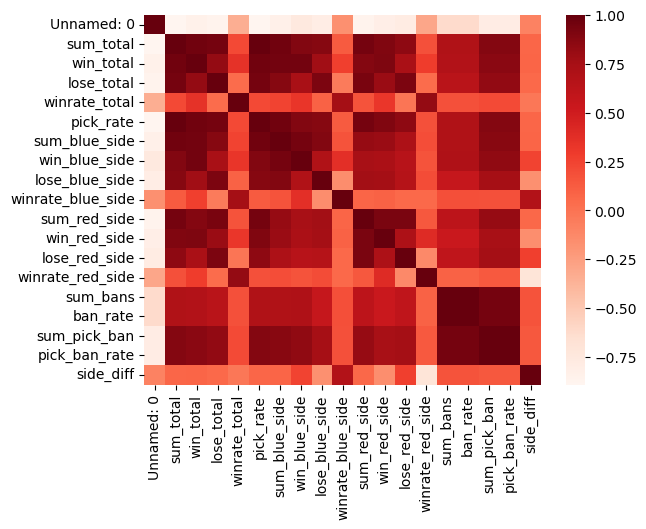

In [37]:
sns.heatmap(df.corr(), cmap='Reds')